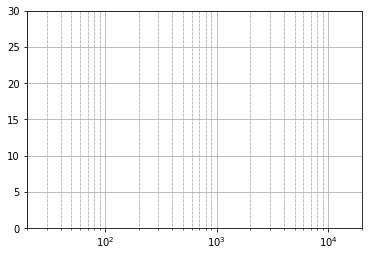

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

dataDict = {}
fig, _ = plt.subplots()
myPlotDict = {'main': fig.axes[0]}

x_lim = [20,20000]
y_lim = [0, 30]

for key in myPlotDict.keys():
    ax = myPlotDict[key]
    ax.set_xscale('log')
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.grid()
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')


{'main': <AxesSubplot:>, 'AP': <AxesSubplot:>}


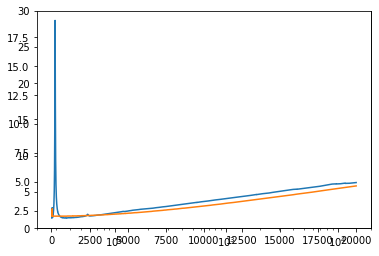

In [11]:
title_AP, data_AP = _get_AP_txt_file()
# dataDict[title_AP] = data_AP
# fig.add_subplot(111)
# myPlotDict[title_AP] = fig.axes[len(fig.axes)-1]


# for col in data_AP.columns[1:]:
#     myPlotDict[title_AP].plot(data_AP['Frequency'], data_AP[col], label=col)


# print(myPlotDict)
# fig

In [10]:
def _get_AP_txt_file():
    path = 'BBQ_Impedance_one.csv'

    with open(path, 'r', encoding='UTF-8', errors='ignore') as file: #, encoding='UTF-8'
        headers = file.readlines()[:4]

        headers
        cols = headers[1]
        cols = cols.strip().split(",")
        cols = [x for x in cols if x]
        cols.insert(0, 'Frequency')
        cols

        data = pd.read_csv(path,  skiprows=5)
        data = data.dropna()
        data = data.iloc[:, [i%2==1 or i==0 for i in range(len(data.columns))]]

        data.columns = cols
        for col in data.columns:
            data[col] = data[col].transform(pd.to_numeric, errors='coerce').round(decimals=2)
        title = headers[0]
        title = title[:title.find(',')].strip('""')
        title="AP"
        
    return title, data

title_AP, data_AP = _get_AP_txt_file()

In [12]:
path = 'BBQ_Impedance_one.csv'

with open(path, 'r', encoding='UTF-8', errors='ignore') as file: #, encoding='UTF-8'
    headers = file.readlines()[:4]

    headers
    cols = headers[1]
    cols = cols.strip().split(",")
    cols = [x for x in cols if x]
    cols.insert(0, 'Frequency')
    cols

    data = pd.read_csv(path,  skiprows=5)
    data = data.dropna()
    data = data.iloc[:, [i%2==1 or i==0 for i in range(len(data.columns))]]

    data.columns = cols
    for col in data.columns:
        data[col] = data[col].transform(pd.to_numeric, errors='coerce').round(decimals=2)
    title = headers[0]
    title = title[:title.find(',')].strip('""')
    title="AP"

return title, data

SyntaxError: 'return' outside function (<ipython-input-12-930b16cf4439>, line 24)

In [78]:
import io  

f = open('BBQ_Impedance_all.csv', 'r')
path = 'BBQ_Impedance_all.csv'

full_data = f.read()

data_slice = full_data.split('\n\n')

data0 = pd.read_csv(io.StringIO(data_slice[0]))
data1 = pd.read_csv(io.StringIO(data_slice[1]))

title = data0.columns[0]
note = data0.columns[1]
title, note

curves = data0.iloc[0, [i%2==0 for i in range(len(data0.columns))]].values.tolist()
curves = ['Frequency'] + curves

data0 = data0.iloc[3:, [i%2==1 or i==0 for i in range(len(data0.columns))]]
data0.columns = curves
data0

,Frequency,Unprocessed,Fit
3,19.2307692307692,1.85012176785299,2.02753106305494
4,20.8333333333333,1.86000202967639,2.02835197605674
5,22.4358974358974,1.87175386929235,2.02935081143049
6,24.0384615384615,1.88469705877908,2.03057418929259
7,25.6410256410256,1.89858272811716,2.03208505679162
...,...,...,...
728,19556.0897435897,4.87356134600842,4.55912287913342
729,19557.6923076923,4.87312590578417,4.55942287427116
730,19850.9615384615,4.90879609892037,4.61440255386087
731,19852.5641025641,4.90903146502009,4.6147034242356


In [37]:
import numpy as np
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(3, 8), index=["A", "B", "C"], columns=index)

df
# tuples

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A      -0.299618 -0.227829  0.391032  0.481195 -1.175664  0.857337  1.871246   
B      -0.808059 -0.137892  0.173632 -0.802565 -1.011415  1.162991 -1.751129   
C      -0.883409  0.265138  0.370439 -0.942979  1.351399  0.296322  1.017817   

first             
second       two  
A      -0.619934  
B       0.851607  
C       0.045638

In [36]:
df['bar']

second,one,two
A,0.187793,-0.387485
B,0.303317,-3.095663
C,-1.017499,-0.352015


In [19]:
path = 'BBQ_Impedance.xlsx'
import warnings

with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    data = pd.read_excel(path, engine="openpyxl", sheet_name=None)
x = []

for key, value in data.items():
    if 'Impedance Magnitude' in key:
#         title = data0.columns[0]
#         note = data0.columns[1]
#         title, note
        curves = value.iloc[0, [i%2==0 for i in range(len(value.columns))]].values.tolist()
        curves = ['Frequency'] + curves

        data[key] = value.iloc[3:, [i%2==1 or i==0 for i in range(len(value.columns))]]
        data[key].columns = curves
        x.append(key)
print(x)
# data[x[1]]

res = pd.merge(data[x[0]],data[x[1]], on='Frequency')
print(res)

['Impedance Magnitude', 'Impedance Magnitude (1)', 'Impedance Magnitude (2)', 'Impedance Magnitude (3)', 'Impedance Magnitude (4)', 'Impedance Magnitude (5)']
        Frequency Unprocessed_x     Fit_x Unprocessed_y     Fit_y
0       19.230769      1.850122  2.027531      1.833975  2.007347
1       20.833333      1.860002  2.028352      1.841769  2.007999
2       22.435897      1.871754  2.029351      1.850884  2.008787
3       24.038462      1.884697  2.030574      1.861692  2.009747
4       25.641026      1.898583  2.032085      1.873923  2.010922
..            ...           ...       ...           ...       ...
725  19556.089744      4.873561  4.559123      4.842407  4.541011
726  19557.692308      4.873126  4.559423      4.841881   4.54131
727  19850.961538      4.908796  4.614403      4.890561  4.596223
728  19852.564103      4.909031  4.614703      4.891248  4.596523
729         20000      4.928546  4.642403        4.9112  4.624189

[730 rows x 5 columns]


In [77]:
path = 'BBQ_Impedance.xlsx'
import warnings

with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    data = pd.read_excel(path, engine="openpyxl", sheet_name=None)

key = 'Impedance Magnitude'
data[key]

,Impedance Magnitude,TCBar-S_#1,Unnamed: 2,Unnamed: 3
0,Unprocessed,NaN,Fit,NaN
1,X,Y,X,Y
2,Hz,ohm,Hz,ohm
3,19.230769,1.850122,19.230769,2.027531
4,20.833333,1.860002,20.833333,2.028352
...,...,...,...,...
728,19556.089744,4.873561,19556.089744,4.559123
729,19557.692308,4.873126,19557.692308,4.559423
730,19850.961538,4.908796,19850.961538,4.614403
731,19852.564103,4.909031,19852.564103,4.614703


In [47]:
title, note, _, _ = data[key].columns
title, note

('Impedance Magnitude', 'TCBar-S_#1')

In [58]:
class curveData:
    def __init__(self, label, note, xdata, ydata):
        self.label = label
        self.note = note
        self.xdata = xdata
        self.ydata = ydata

In [75]:
curveDatas = []
for curveIndex in range(int(len(data[key].columns)/2)):
    label = data[key].iloc[0, curveIndex*2]
    curve_x = pd.Series(data[key].iloc[3:, curveIndex*2], name='x')
    curve_y = pd.Series(data[key].iloc[3:, curveIndex*2+1], name='y')
    curveDatas.append(curveData(label, note, curve_x, curve_y))
print(curveDatas[1].label, curveDatas[1].note)

Fit TCBar-S_#1


In [115]:
df = {}
for key, value in data.items():
    title = data[key].columns[0]
    if title in df: pass
    else: df[title] = []
    
    note = data[key].columns[1] 
    curveDatas = []
    for curveIndex in range(int(len(data[key].columns)/2)):
        label = data[key].iloc[0, curveIndex*2]
        curve_x = pd.Series(data[key].iloc[3:, curveIndex*2], name='x')
        curve_y = pd.Series(data[key].iloc[3:, curveIndex*2+1], name='y')
        curveDatas.append(curveData(label, note, curve_x, curve_y))
#     print(df[title])
    df[title].extend(curveDatas)

for key, value in df.items():
#     print(key, value)
    for it in value:
        print(key, it.note, it.label)

Impedance Magnitude TCBar-S_#1 Unprocessed
Impedance Magnitude TCBar-S_#1 Fit
Impedance Magnitude TCBar-S_#2 Unprocessed
Impedance Magnitude TCBar-S_#2 Fit
Impedance Magnitude TCBar-S_#1_Left Channel Unprocessed
Impedance Magnitude TCBar-S_#1_Left Channel Fit
Impedance Magnitude TCBar-S_#1_Right Channel Unprocessed
Impedance Magnitude TCBar-S_#1_Right Channel Fit
Impedance Magnitude TCBar-S_#2_Left Channel Unprocessed
Impedance Magnitude TCBar-S_#2_Left Channel Fit
Impedance Magnitude TCBar-S_#2_Right Channel Unprocessed
Impedance Magnitude TCBar-S_#2_Right Channel Fit
Impedance Phase TCBar-S_#1 Unprocessed
Impedance Phase TCBar-S_#1 Fit
Impedance Phase TCBar-S_#2 Unprocessed
Impedance Phase TCBar-S_#2 Fit
Impedance Phase TCBar-S_#1_Left Channel Unprocessed
Impedance Phase TCBar-S_#1_Left Channel Fit
Impedance Phase TCBar-S_#1_Right Channel Unprocessed
Impedance Phase TCBar-S_#1_Right Channel Fit
Impedance Phase TCBar-S_#2_Left Channel Unprocessed
Impedance Phase TCBar-S_#2_Left Channe